In [1]:
%run downloader.ipynb

In [2]:
import pandas as pd
import ta
import numpy as np
import seaborn as sns

import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from utils import windowed_dataset, split_sequences


In [3]:
info_data

,open,close,high,low,volume,amount
date,,,,,,
1554940800,5307.6,5016.0,5332.4,4926.4,466.736182,2.370637e+06
1555027200,5018.0,5050.6,5075.0,4873.8,247.758487,1.240250e+06
1555113600,5051.6,5041.7,5091.6,5005.5,167.256504,8.457405e+05
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396,8.928823e+05
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569,1.319227e+06
...,...,...,...,...,...,...
1649116800,46584.1,45501.0,47193.0,45358.0,14414.362821,6.666306e+08
1649203200,45501.0,43166.8,45506.4,43113.7,18658.865059,8.322640e+08
1649289600,43163.6,43442.1,43900.4,42721.8,9970.628318,4.332600e+08


In [4]:
info_data.dtypes

open      float64
close     float64
high      float64
low       float64
volume    float64
amount    float64
dtype: object

In [5]:
info_data = info_data.drop(columns = ["amount"])

In [6]:
info_data

,open,close,high,low,volume
date,,,,,
1554940800,5307.6,5016.0,5332.4,4926.4,466.736182
1555027200,5018.0,5050.6,5075.0,4873.8,247.758487
1555113600,5051.6,5041.7,5091.6,5005.5,167.256504
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569
...,...,...,...,...,...
1649116800,46584.1,45501.0,47193.0,45358.0,14414.362821
1649203200,45501.0,43166.8,45506.4,43113.7,18658.865059
1649289600,43163.6,43442.1,43900.4,42721.8,9970.628318


In [7]:
df = ta.utils.dropna(info_data)
print(df.columns)

Index(['open', 'close', 'high', 'low', 'volume'], dtype='object')


In [8]:
window = 12
df = ta.add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna = True)

C:\Users\anton\anaconda3\envs\dev\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\anton\anaconda3\envs\dev\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [9]:
df

,open,close,high,low,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
1554940800,5307.6,5016.0,5332.4,4926.4,466.736182,-260.728488,466.736182,-0.558621,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5016.000000,-80.231594,0.000000,0.000000
1555027200,5018.0,5050.6,5075.0,4873.8,247.758487,-73.062517,714.494669,-0.102258,8.572444e+03,-1.258726e+10,...,0.054998,0.011000,0.043998,-3.877403,-0.775481,-3.101922,5034.265005,0.689793,0.687424,0.689793
1555113600,5051.6,5041.7,5091.6,5005.5,167.256504,-99.675921,547.238165,-0.113043,7.135154e+03,3.817080e+09,...,0.083286,0.025457,0.057829,-8.701777,-2.360740,-6.341037,5038.107374,-0.176217,-0.176372,0.512360
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396,39.961770,723.470562,0.037772,8.432044e+03,2.255408e+09,...,0.250283,0.070422,0.179861,-12.618504,-4.412293,-8.206211,5088.428790,1.824781,1.808332,2.346491
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569,-26.927322,463.691992,-0.020434,3.405010e+03,-1.424889e+09,...,0.214978,0.099333,0.115645,-13.990409,-6.327916,-7.662493,5057.825692,-2.006350,-2.026751,0.293062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649116800,46584.1,45501.0,47193.0,45358.0,14414.362821,474812.959575,93901.747247,0.032001,-1.428375e+05,3.729995e+09,...,3.305489,3.370102,-0.064613,33.627839,22.845589,10.782250,45828.218979,-2.325042,-2.352498,807.117225
1649203200,45501.0,43166.8,45506.4,43113.7,18658.865059,456982.268324,75242.882188,-0.035986,-6.344364e+06,-2.520374e+10,...,2.633764,3.222834,-0.589070,30.301407,24.336753,5.964654,45516.105126,-5.129997,-5.266262,760.582137
1649289600,43163.6,43442.1,43900.4,42721.8,9970.628318,459198.715481,85213.510505,-0.036602,-5.045896e+06,-1.180831e+10,...,2.125404,3.003348,-0.877945,23.711631,24.211728,-0.500098,45270.986092,0.637759,0.635734,766.070574


In [10]:
df["pct_change"] = df["close"].pct_change()


In [11]:
df

,open,close,high,low,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,pct_change
date,,,,,,,,,,,,,,,,,,,,,
1554940800,5307.6,5016.0,5332.4,4926.4,466.736182,-260.728488,466.736182,-0.558621,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,5016.000000,-80.231594,0.000000,0.000000,NaN
1555027200,5018.0,5050.6,5075.0,4873.8,247.758487,-73.062517,714.494669,-0.102258,8.572444e+03,-1.258726e+10,...,0.011000,0.043998,-3.877403,-0.775481,-3.101922,5034.265005,0.689793,0.687424,0.689793,0.006898
1555113600,5051.6,5041.7,5091.6,5005.5,167.256504,-99.675921,547.238165,-0.113043,7.135154e+03,3.817080e+09,...,0.025457,0.057829,-8.701777,-2.360740,-6.341037,5038.107374,-0.176217,-0.176372,0.512360,-0.001762
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396,39.961770,723.470562,0.037772,8.432044e+03,2.255408e+09,...,0.070422,0.179861,-12.618504,-4.412293,-8.206211,5088.428790,1.824781,1.808332,2.346491,0.018248
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569,-26.927322,463.691992,-0.020434,3.405010e+03,-1.424889e+09,...,0.099333,0.115645,-13.990409,-6.327916,-7.662493,5057.825692,-2.006350,-2.026751,0.293062,-0.020064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649116800,46584.1,45501.0,47193.0,45358.0,14414.362821,474812.959575,93901.747247,0.032001,-1.428375e+05,3.729995e+09,...,3.370102,-0.064613,33.627839,22.845589,10.782250,45828.218979,-2.325042,-2.352498,807.117225,-0.023250
1649203200,45501.0,43166.8,45506.4,43113.7,18658.865059,456982.268324,75242.882188,-0.035986,-6.344364e+06,-2.520374e+10,...,3.222834,-0.589070,30.301407,24.336753,5.964654,45516.105126,-5.129997,-5.266262,760.582137,-0.051300
1649289600,43163.6,43442.1,43900.4,42721.8,9970.628318,459198.715481,85213.510505,-0.036602,-5.045896e+06,-1.180831e+10,...,3.003348,-0.877945,23.711631,24.211728,-0.500098,45270.986092,0.637759,0.635734,766.070574,0.006378


In [12]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [13]:
# df = df[['open', 'high', 'low', 'close', 'volume', 'pct_change', 'volume_adi', 'volume_obv',
#        'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
#        'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
#        'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
#        'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
#        'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
#        'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
#        'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
#        'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
#        'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
#        'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
#        'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
#        'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
#        'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
#        'trend_stc', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
#        'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
#        'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
#        'trend_psar_down', 'trend_psar_up_indicator',
#        'trend_psar_down_indicator', 'momentum_rsi', 'momentum_stoch_rsi',
#        'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
#        'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
#        'momentum_ao', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
#        'momentum_ppo_hist', 'momentum_pvo', 'momentum_pvo_signal',
#        'momentum_pvo_hist', 'momentum_kama', 'others_dr', 'others_dlr',
#        'others_cr']]

In [14]:
df.shape

(1095, 92)

In [15]:
print(df)

               open    close     high      low        volume     volume_adi  \
date                                                                          
1554940800   5307.6   5016.0   5332.4   4926.4    466.736182    -260.728488   
1555027200   5018.0   5050.6   5075.0   4873.8    247.758487     -73.062517   
1555113600   5051.6   5041.7   5091.6   5005.5    167.256504     -99.675921   
1555200000   5045.8   5133.7   5148.9   5002.5    176.232396      39.961770   
1555286400   5134.6   5030.7   5167.2   4950.1    259.778569     -26.927322   
...             ...      ...      ...      ...           ...            ...   
1649116800  46584.1  45501.0  47193.0  45358.0  14414.362821  474812.959575   
1649203200  45501.0  43166.8  45506.4  43113.7  18658.865059  456982.268324   
1649289600  43163.6  43442.1  43900.4  42721.8   9970.628318  459198.715481   
1649376000  43441.1  42262.7  43976.1  42108.0  14012.935229  447506.642175   
1649462400  42262.7  42484.4  42639.0  42123.0   301

In [16]:
corr = df.corr()

C:\Users\anton\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

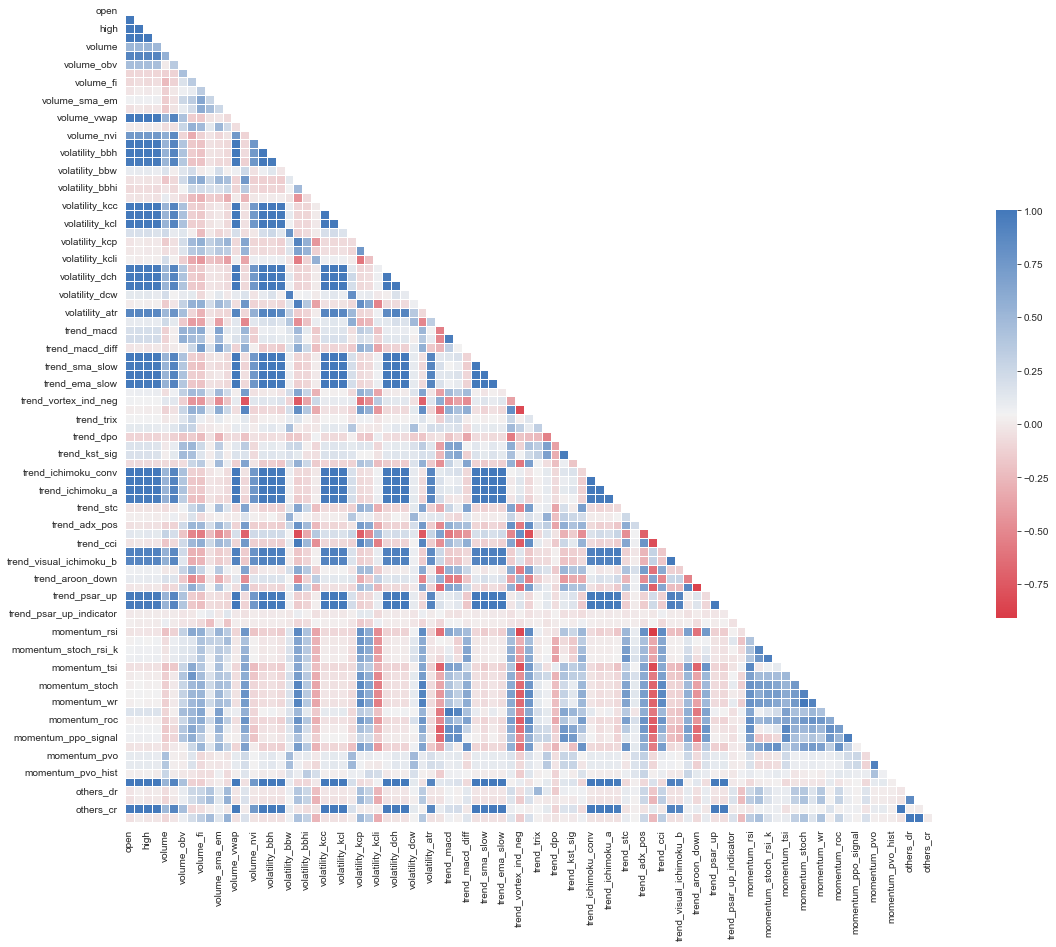

In [17]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [18]:
# # import pandas as pd
# # from sklearn.preprocessing import StandardScaler
#define columns to use for PCA
# X = df.drop(columns=["pct_change"])
pct_change = df.iloc[:,-1]
df = df.iloc[:,0:91]


#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=df.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [19]:
# from sklearn.decomposition import PCA
# pca.fit_transform(df)
#define PCA model to use
n_components = 10
pca = PCA(n_components=n_components)
print(pca)

#fit PCA model to data
pcafit = pca.fit_transform(scaled_df) # choose 10 as component number and found 3 component is sufficient for the scree plot.
print(pcafit)




PCA(n_components=10)
[[-5.09125189  9.38115325 -2.94371453 ...  4.10988319  5.35265739
  13.55520706]
 [-5.88295229  5.14068713 -1.01729821 ...  2.12752864  0.54293877
  -2.30600651]
 [-5.88449899  4.95808908 -0.91230884 ...  1.91190691 -0.11990002
  -2.53472512]
 ...
 [ 6.52150183  1.6105207   3.634307   ...  0.76467758 -1.86169958
   0.5361175 ]
 [ 6.89258239  3.24095565  3.85731219 ...  0.88365964 -2.3158656
   1.05184354]
 [ 6.56312464  3.40892399  3.43923218 ...  0.44013194 -1.84062587
   0.04795367]]


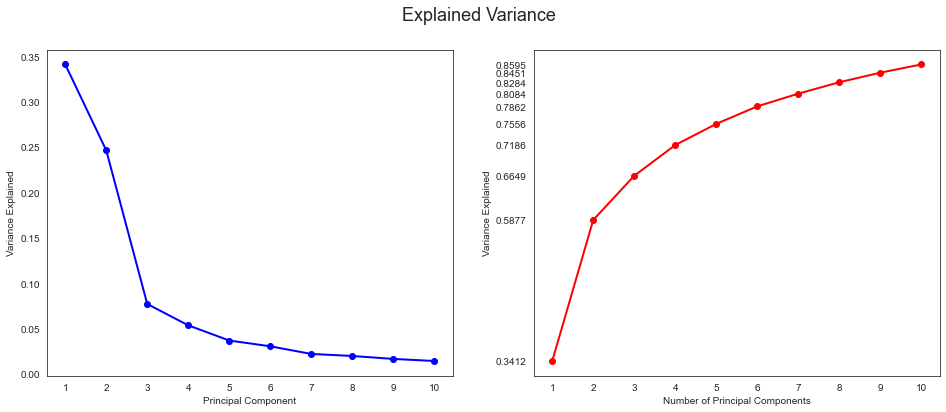

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np

PC_values = np.arange(pca.n_components_) + 1

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (16,6))
fig.suptitle('Explained Variance',fontsize=18)
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
ax2.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2,color='red')
ax1.set_xlabel('Principal Component')
ax2.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Variance Explained')
ax2.set_ylabel('Variance Explained')
ax1.xaxis.set_ticks(PC_values)
ax2.xaxis.set_ticks(PC_values)
ax2.yaxis.set_ticks(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [24]:
pcas = [] 
for c_ in range(10):
    pcas.append(f'PCA{c_+1}')
pca_df = pd.DataFrame(pcafit,columns=pcas,index=df.index)
pca_df['pct_change'] = pct_change
pca_df.dropna(inplace=True)

pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,pct_change
date,,,,,,,,,,,
1555027200,-5.882952,5.140687,-1.017298,9.332732,2.035390,10.688793,3.727118,2.127529,0.542939,-2.306007,0.006898
1555113600,-5.884499,4.958089,-0.912309,9.622734,2.974677,9.942993,4.075490,1.911907,-0.119900,-2.534725,-0.001762
1555200000,-6.333730,3.230921,-1.544438,9.441975,1.312829,10.438284,3.828281,1.361533,0.617980,-2.721761,0.018248
1555286400,-5.821180,5.181649,-1.031510,9.298066,2.134254,9.195817,4.063050,1.645254,0.503637,-2.444817,-0.020064
1555372800,-6.355741,3.024877,-1.751309,9.153934,0.869325,9.922244,3.609812,1.060958,0.806589,-2.931251,0.028485
1555459200,-6.432993,2.686420,-1.742164,9.216141,1.207266,9.710634,3.746256,0.717054,1.032577,-2.748860,0.004986
1555545600,-6.591528,1.773306,-2.198831,9.087968,0.169679,10.031950,3.477877,0.387796,1.419553,-2.473810,0.011597
1555632000,-6.555235,1.865887,-1.852443,9.120966,1.127014,9.447148,3.727257,0.150820,1.448888,-2.889963,0.000095
1555718400,-6.608591,1.518890,-1.943176,9.081234,0.967394,9.401533,3.657937,0.007728,1.547220,-3.018730,0.006045


In [22]:
pca_df = pca_df.to_numpy()
pca_df

array([[-5.88295229e+00,  5.14068713e+00, -1.01729821e+00, ...,
         5.42938773e-01, -2.30600651e+00,  6.89792663e-03],
       [-5.88449899e+00,  4.95808908e+00, -9.12308843e-01, ...,
        -1.19900015e-01, -2.53472512e+00, -1.76216687e-03],
       [-6.33372997e+00,  3.23092103e+00, -1.54443849e+00, ...,
         6.17979557e-01, -2.72176084e+00,  1.82478132e-02],
       ...,
       [ 6.52150183e+00,  1.61052070e+00,  3.63430700e+00, ...,
        -1.86169958e+00,  5.36117496e-01,  6.37758648e-03],
       [ 6.89258239e+00,  3.24095565e+00,  3.85731219e+00, ...,
        -2.31586560e+00,  1.05184354e+00, -2.71487796e-02],
       [ 6.56312464e+00,  3.40892399e+00,  3.43923218e+00, ...,
        -1.84062587e+00,  4.79536654e-02,  5.24576045e-03]])

In [23]:
window = 5
dataset = windowed_dataset(pca_df,window,1,pca_df.shape[0])
for x,y in dataset:
    print(x.numpy(),y.numpy())

[[[ 6.73128552e+00  6.90973661e+00 -2.15013595e+00 -2.09961423e+00
    6.76925862e-01  1.58170179e+00 -2.67286500e+00  8.42052360e-01
   -1.90787260e+00 -2.45209779e-01  1.16347066e-02]
  [ 6.22716133e+00  6.00068334e+00 -2.85287925e+00 -1.66475673e+00
   -2.14831609e-01  1.36156270e+00 -1.26609180e+00 -4.37601326e-01
   -1.82755721e+00 -2.94517936e-01  7.67544458e-03]
  [ 6.21975522e+00  5.85040162e+00 -3.01878964e+00 -1.81772051e+00
    4.90723032e-01  1.50211367e+00 -1.21503994e+00 -5.17315406e-01
   -2.02525501e+00  1.85222031e-01 -3.92619511e-03]
  [ 5.95730059e+00  5.28783503e+00 -3.32617406e+00 -1.83755673e+00
   -8.09819510e-02  1.24326764e+00 -8.48530172e-01 -7.89613809e-01
   -1.72384934e+00  1.26917864e-02  9.64364687e-03]
  [ 5.67106351e+00  4.08625735e+00 -3.83716606e+00 -1.90281926e+00
   -5.27525994e-01  1.06319035e+00 -5.87016376e-01 -6.87852234e-01
   -1.71967853e+00  1.36933741e-01  1.47658663e-02]]] [0.0123026]
[[[ 7.29763891  1.46940507 -1.92981153  1.95525286  0.59

## Model creation

In [ ]:
nn = Sequential([
    Dense(units=2*n_components*window, input_shape=[n_components*window], activation='relu'),
    Dense(units=int(1.5*n_components*window) ,activation='relu')
])

In [ ]:
nn.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

nn.fit(dataset,epochs=100,verbose=0)